In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
from pathlib import Path

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import yaml
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [20]:
## Loading the config file
with open('config.yaml', 'r') as f:
    config = yaml.load(f)

print(config)

{'PATH': {'PROJECT_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD', 'SCRIPT_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\scripts', 'MODELS_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\models', 'DATA_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\data', 'ANALYSIS_REPORTS_PATH': 'D:\\Kaggle\\MachineLearning_CI_CD\\documents\\Analysis\\'}}


In [3]:
## Loading the dataset
train = pd.read_csv(os.path.join(config['PATH']['DATA_PATH'], 'train.csv'))
train.head()
test = pd.read_csv(os.path.join(config['PATH']['DATA_PATH'], 'test.csv'))
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [4]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [5]:
## Missing value analysis
## Numerical variables
## Distribution of numerical variables
## Outliers
## Categorical variables
## Cardinality of categorical variables
## Relationship between variables and target

1. Missing values

In [6]:
## Make a list of variables that contain missing values
vars_with_na = [var for var in train.columns if train[var].isnull().sum() > 0]

## Determine percentage of missing values
train[vars_with_na].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [7]:
print('Number of variables with missing values:', (vars_with_na))

Number of variables with missing values: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


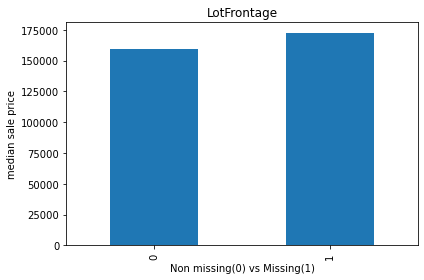

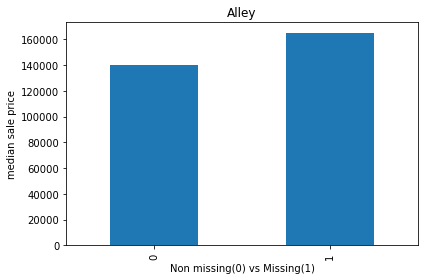

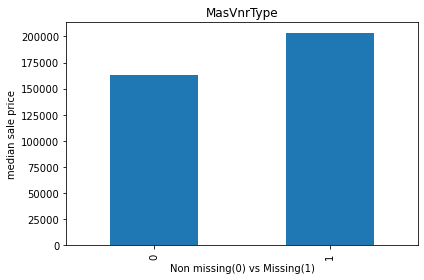

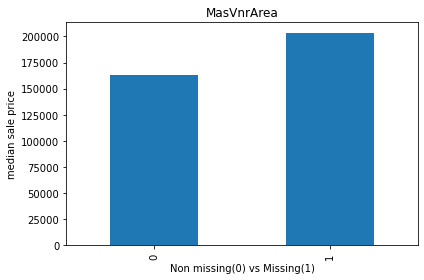

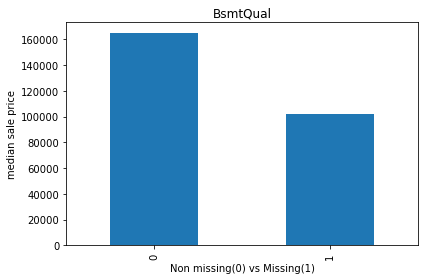

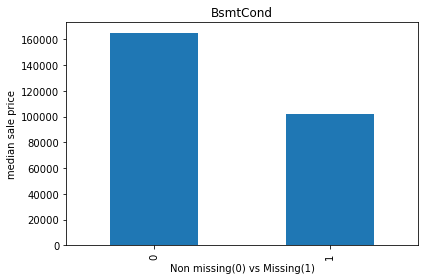

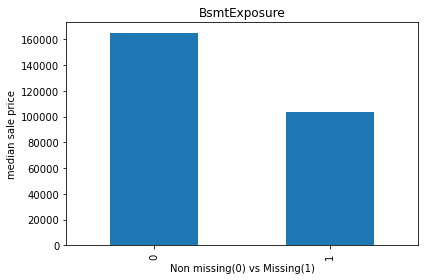

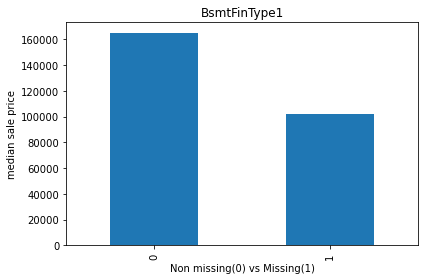

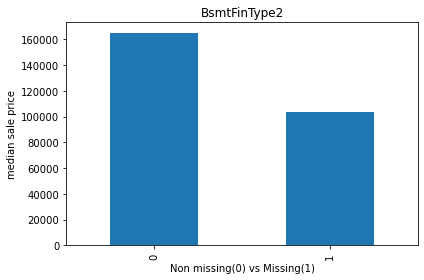

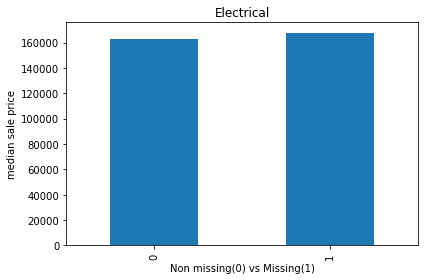

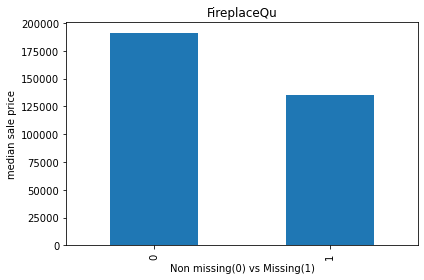

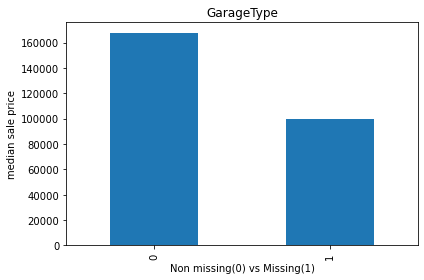

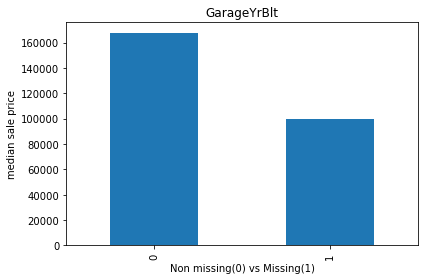

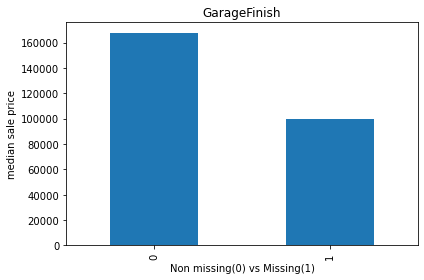

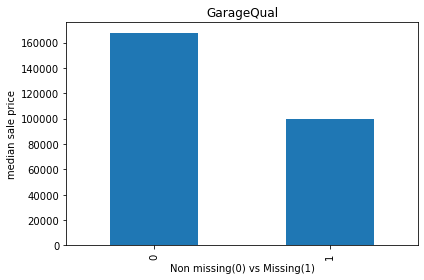

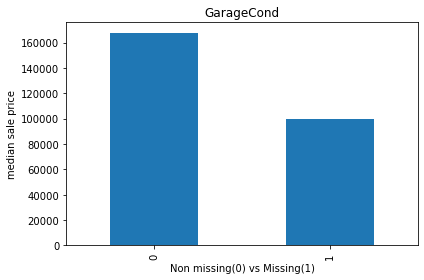

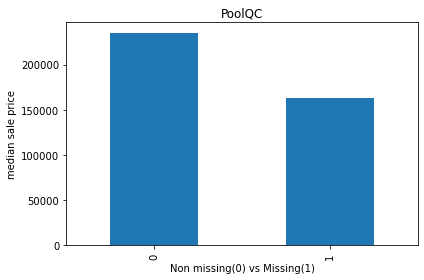

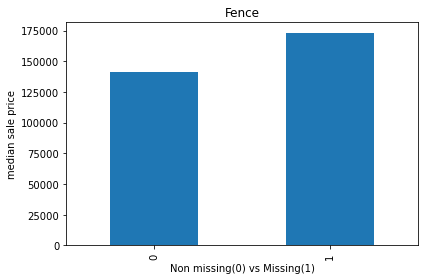

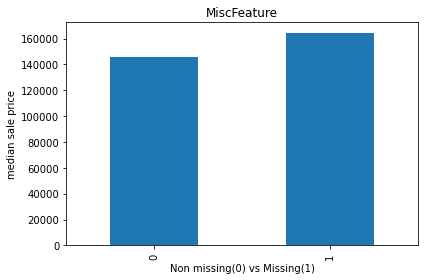

In [8]:
def analyse_missing_var_target(df, var):
    df = df.copy()

    df[var] = np.where(df[var].isnull(), 1, 0)
    df.groupby(var)['SalePrice'].median().plot.bar()   

    plt.title(var)
    plt.xlabel('Non missing(0) vs Missing(1)')
    plt.ylabel('median sale price')
    plt.tight_layout()
    plt.savefig(os.path.join(config['PATH']['ANALYSIS_REPORTS_PATH'], '{}_MedianSalePrice.png'.format(var)), dpi=250, transparent = True)
    plt.show()
    

for var in vars_with_na:
    analyse_missing_var_target(train, var)

In [9]:
## Numerical variables
num_vars = [var for var in train.columns if train[var].dtypes != 'O']

print('Number of Numeric variables: ', len(num_vars))

Number of Numeric variables:  38


In [10]:
print(num_vars)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [11]:
train[num_vars].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [12]:
## Temporal variables
years_vars = [var for var in train.columns if 'Yr' in var or 'Year' in var]

print(years_vars)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [13]:
for var in years_vars:
    print(var, train[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

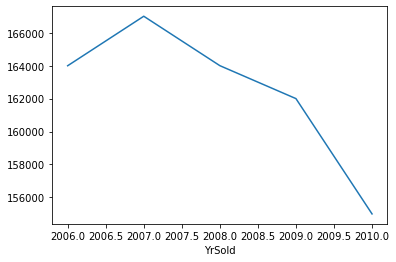

In [14]:
train.groupby('YrSold')['SalePrice'].median().plot()

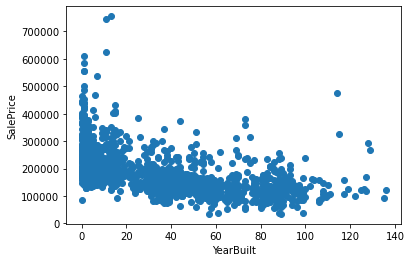

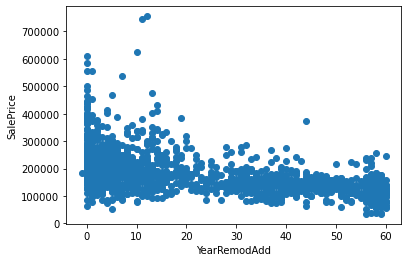

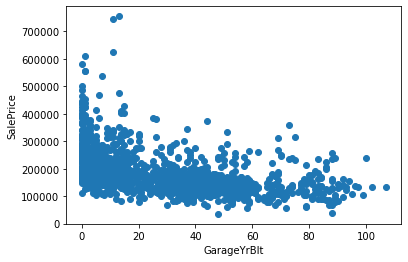

In [15]:
def analyse_years_var(df, var):
    df = df.copy()

    df[var] = df['YrSold'] - df[var]

    plt.scatter(df[var], df['SalePrice'])
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.show()

for var in years_vars:
    if var != 'YrSold':
        analyse_years_var(train, var)

In [17]:
## Discrete variables

discrete_vars = [var for var in num_vars if train[var].nunique() <20 and var not in years_vars + ['Id']]

print('Number of discrete variables is:', len(discrete_vars))

Number of discrete variables is: 14


In [18]:
train[discrete_vars].head()

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   
3          70            7            5             1             0         1   
4          60            8            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   PoolArea  MoSold  
0         0       2  
1         0       5  
2         0       9  
3         0       2  
4         0      12

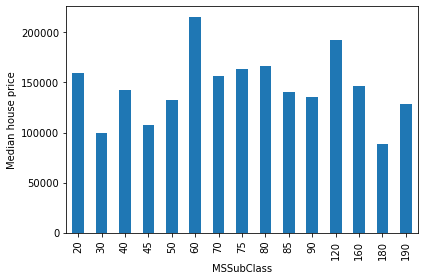

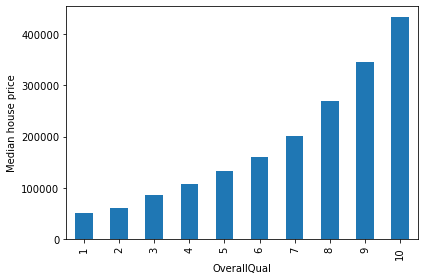

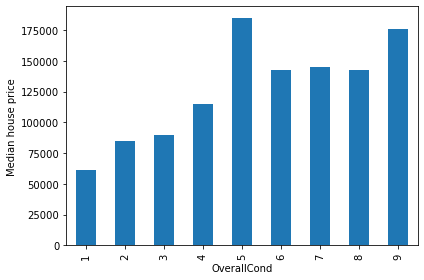

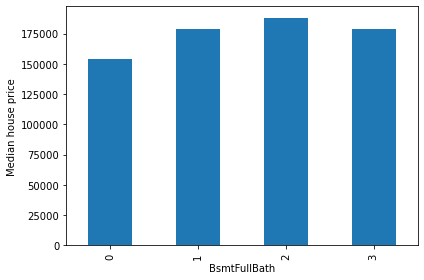

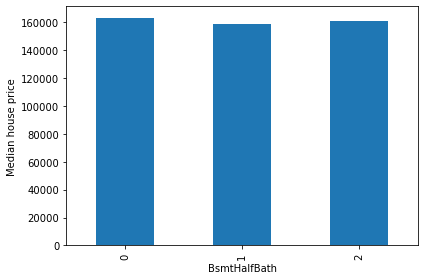

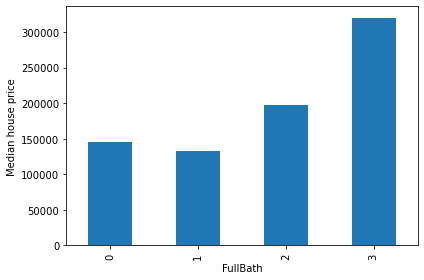

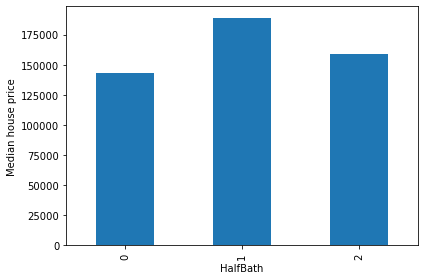

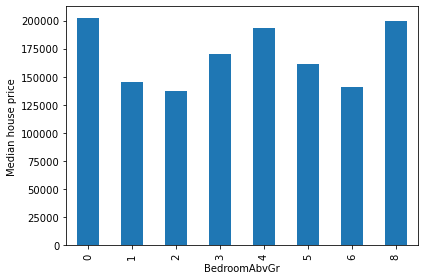

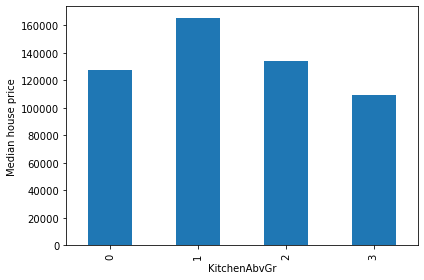

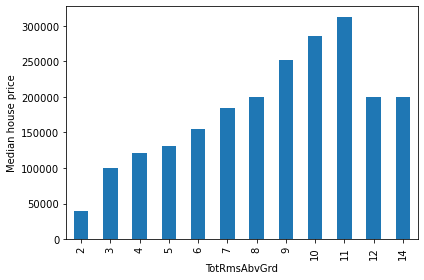

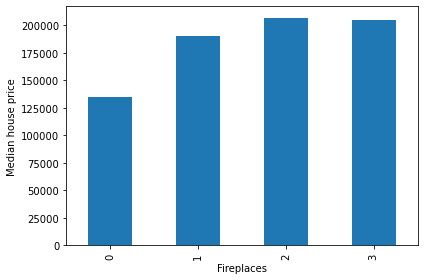

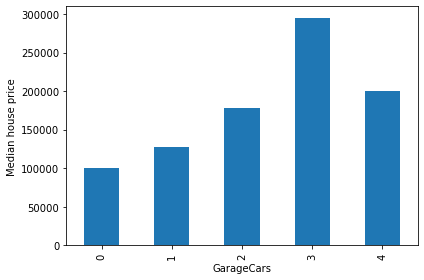

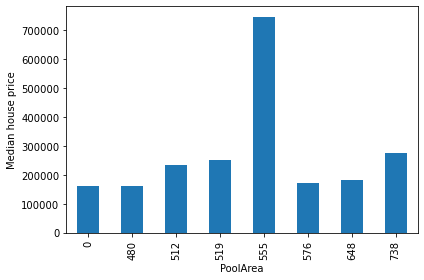

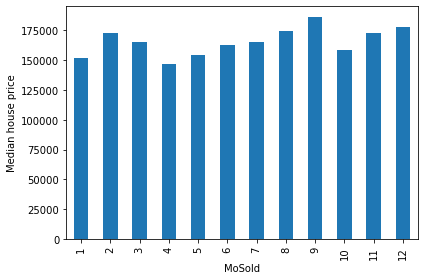

In [21]:
def analyze_discrete(df, var):
    df = df.copy()

    df.groupby(var)['SalePrice'].median().plot.bar()
    plt.xlabel(var)
    plt.ylabel('Median house price')
    plt.tight_layout()
    plt.savefig(os.path.join(config['PATH']['ANALYSIS_REPORTS_PATH'] + 'discrete_vars', '{}_MedianSalePrice.png'.format(var)), dpi=250, transparent = True)
    plt.show()


for var in discrete_vars:
    analyze_discrete(train, var)



In [23]:
cont_vars = [var for var in num_vars if var not in discrete_vars + years_vars + ['Id']]

print('Number of Continuous variables is:', len(cont_vars))

Number of Continuous variables is: 19


In [25]:
train[cont_vars].head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   
3           0           35            272          0            0        0   
4         192           84              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

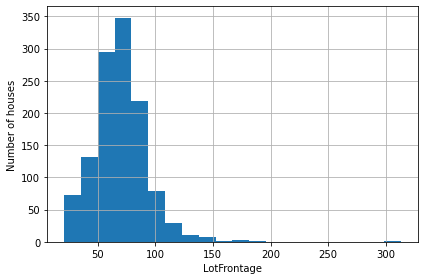

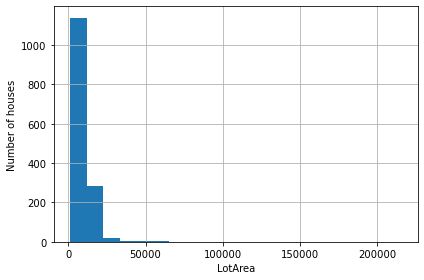

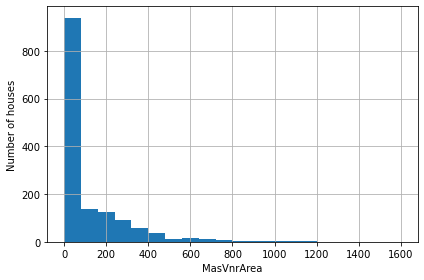

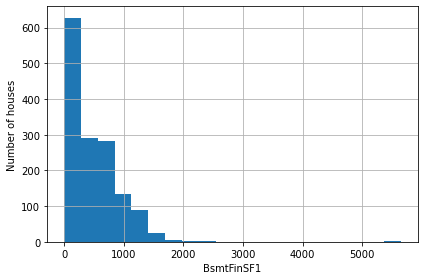

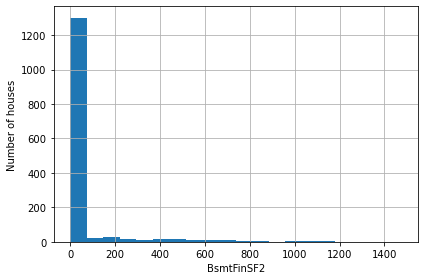

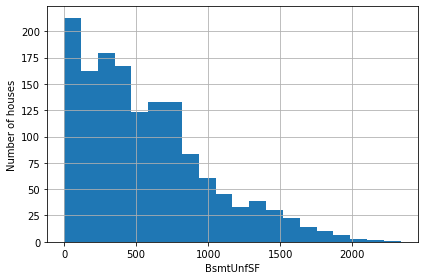

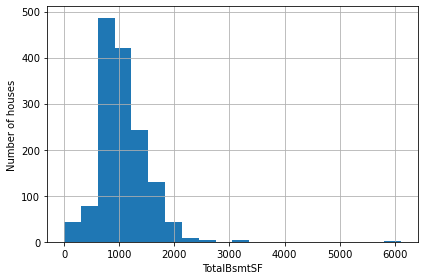

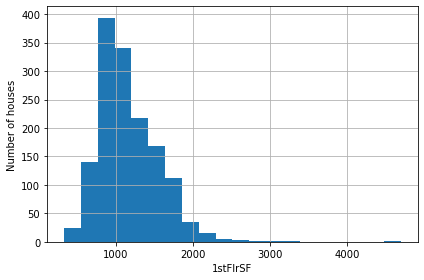

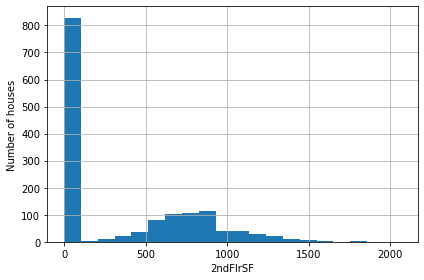

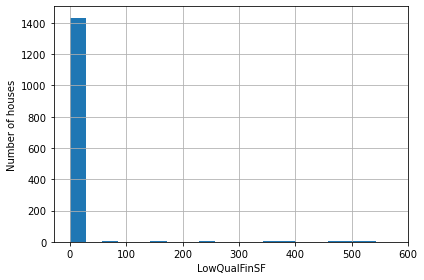

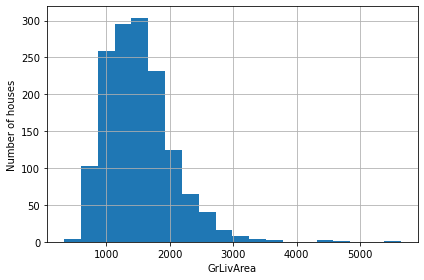

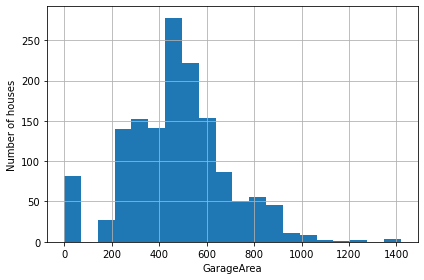

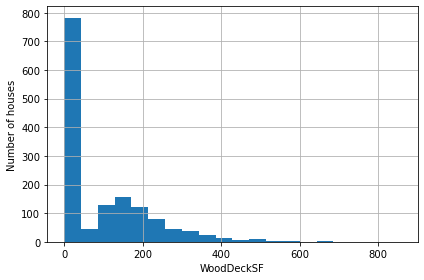

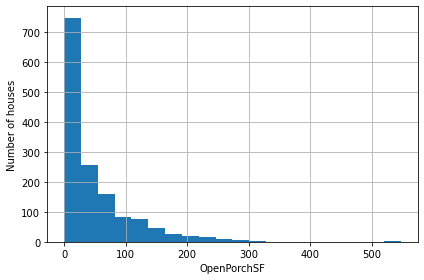

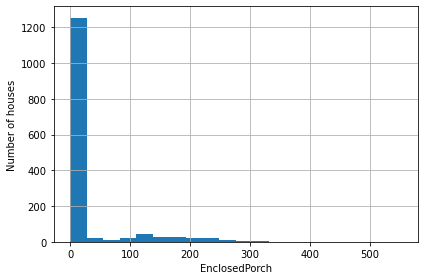

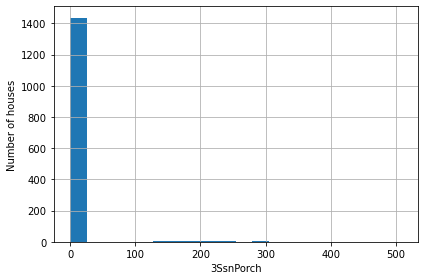

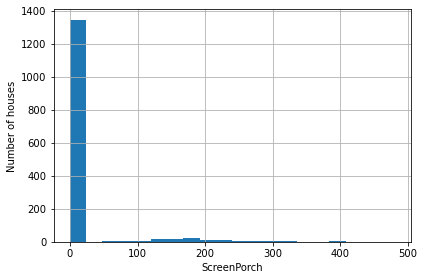

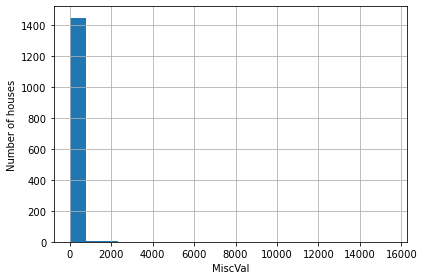

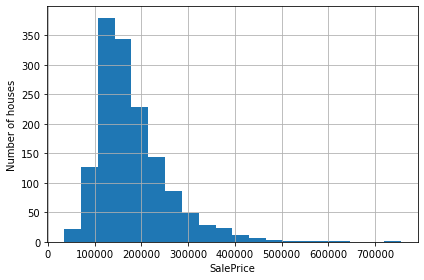

In [29]:
def analyze_continuous(df, var):
    df = df.copy()
    df[var].hist(bins = 20)

    plt.xlabel(var)
    plt.ylabel('Number of houses')
    plt.tight_layout()
    plt.savefig(os.path.join(config['PATH']['ANALYSIS_REPORTS_PATH'] + 'continuous_vars', '{}_distribution.png'.format(var)), dpi=250, transparent = True)
    plt.show()


for var in cont_vars:
    analyze_continuous(train, var)


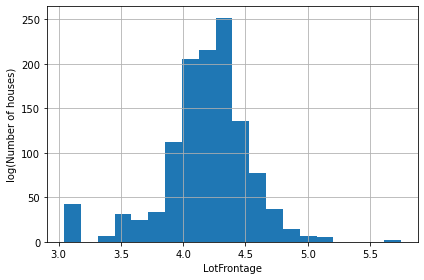

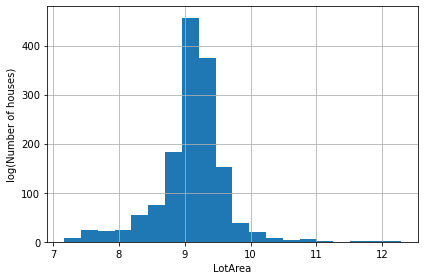

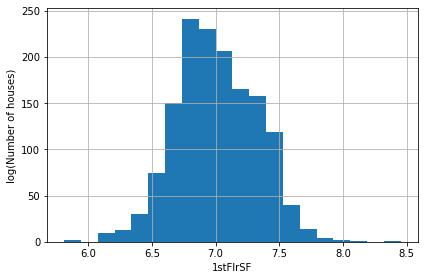

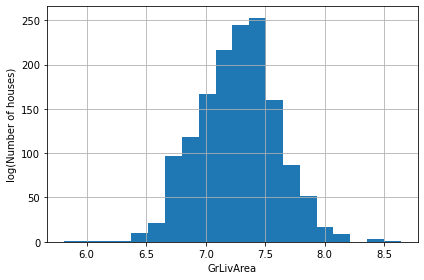

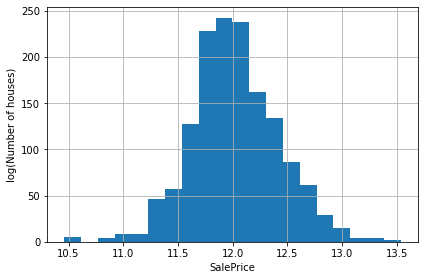

In [30]:
def analyze_continuous_transform(df, var):
    df = df.copy()

    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df[var].hist(bins = 20)
        plt.xlabel(var)
        plt.ylabel('log(Number of houses)')
        plt.tight_layout()
        plt.savefig(os.path.join(config['PATH']['ANALYSIS_REPORTS_PATH'] + 'continuous_vars', '{}_log_transform.png'.format(var)), dpi=250, transparent = False)
        plt.show()


for var in cont_vars:
    analyze_continuous_transform(train, var)

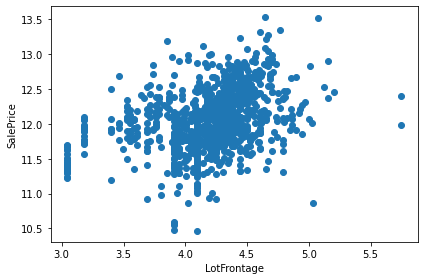

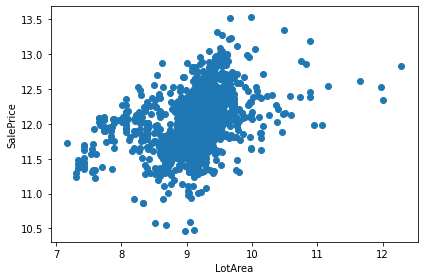

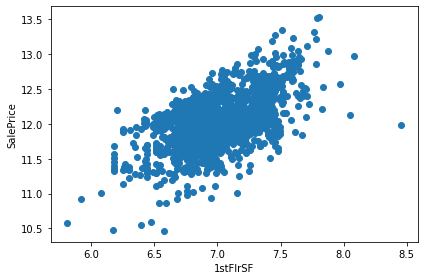

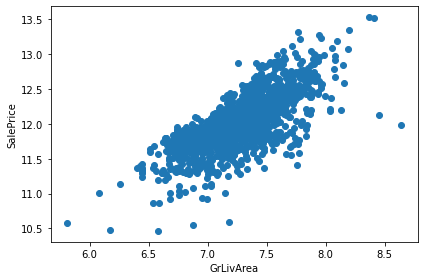

In [32]:
def analyze_continuous_transform_with_target(df, var):

    df = df.copy()

    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[var], df['SalePrice'])
        plt.xlabel(var)
        plt.ylabel('SalePrice')
        plt.tight_layout()
        plt.savefig(os.path.join(config['PATH']['ANALYSIS_REPORTS_PATH'] + 'continuous_vars', '{}_log_transformed_with_target.png'.format(var)), dpi=250, transparent = True)
        plt.show()

for var in cont_vars:
    if 'SalePrice' not in var:
        analyze_continuous_transform_with_target(train, var)

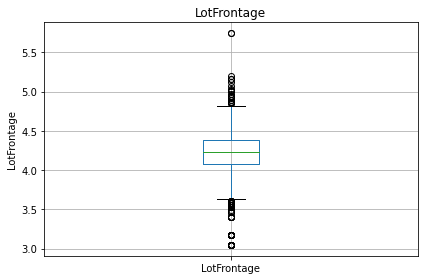

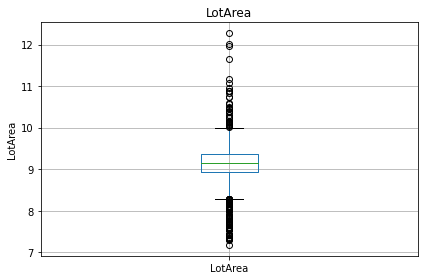

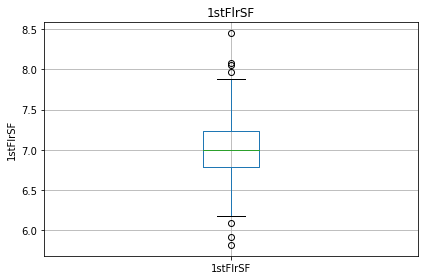

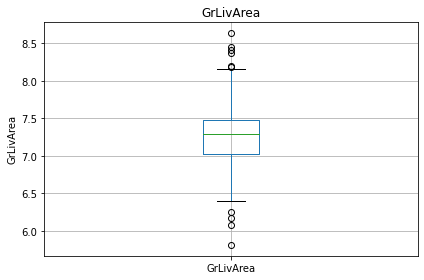

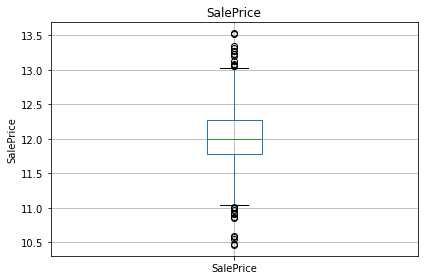

In [33]:
## Outliers

def analyze_outliers(df, var):

    df = df.copy()

    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column = var)
        plt.title(var)
        plt.ylabel(var)
        plt.tight_layout()
        plt.savefig(os.path.join(config['PATH']['ANALYSIS_REPORTS_PATH'] + 'continuous_vars', '{}_outliers.png'.format(var)), dpi=250, transparent = True)
        plt.show()


for var in cont_vars:
    analyze_outliers(train, var)

In [34]:
## Categorical variables
cat_vars = [var for var in train.columns if train[var].dtypes =='O']

print('Number of categorical variables is:', len(cat_vars))

Number of categorical variables is: 43


In [36]:
train[cat_vars].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

In [37]:
## Cardinality of categorical variables

for var in cat_vars:
    print(var , 'has', train[var].nunique(), 'categories')

MSZoning has 5 categories
Street has 2 categories
Alley has 2 categories
LotShape has 4 categories
LandContour has 4 categories
Utilities has 2 categories
LotConfig has 5 categories
LandSlope has 3 categories
Neighborhood has 25 categories
Condition1 has 9 categories
Condition2 has 8 categories
BldgType has 5 categories
HouseStyle has 8 categories
RoofStyle has 6 categories
RoofMatl has 8 categories
Exterior1st has 15 categories
Exterior2nd has 16 categories
MasVnrType has 4 categories
ExterQual has 4 categories
ExterCond has 5 categories
Foundation has 6 categories
BsmtQual has 4 categories
BsmtCond has 4 categories
BsmtExposure has 4 categories
BsmtFinType1 has 6 categories
BsmtFinType2 has 6 categories
Heating has 6 categories
HeatingQC has 5 categories
CentralAir has 2 categories
Electrical has 5 categories
KitchenQual has 4 categories
Functional has 7 categories
FireplaceQu has 5 categories
GarageType has 6 categories
GarageFinish has 3 categories
GarageQual has 5 categories
Garag

In [ ]:
## Rare labels
def analyze_rare_labels(df, var, rare_perc):

    df = df.copy()
    